In [68]:
import pandas as pd 
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix





In [137]:
df1 = pd.read_pickle('lamentized.pkl')

In [138]:
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,preprocessed
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,06-02-2013,We get this GPS for my husband who be an OTR o...
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,11-25-2010,I m a professional OTR truck driver and I buy ...
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,09-09-2010,Well what can I say I ve have this unit in my ...
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",11-24-2010,Not go to write a long review even think this ...
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",09-29-2011,I ve have mine for a year and here s what we g...


In [139]:
df = df1[:100000]

In [72]:
df['preprocessed'].iloc[26]

'I use this for my 47 Samsung Its fit feel be great Easy installation Appears strong although I personally spend way too much on the tv to risk leave it fully outstretched with too little lag bolt for a long time It be very convenient to be able to move it away from the wall however and I would feel very comfortable tilt or swivel if need The movement be fluid and easily adjustable I be very pleased with my purchase'

In [73]:
# getting rid of the all the accents 
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
df["preprocessed"] = df["preprocessed"].apply(remove_accent)




In [74]:
# getting rid of all the punctuation 
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

In [75]:
# converitng to lowercase so words like Iphone are similar to iphone
df["preprocessed"] = df["preprocessed"].str.lower()

In [76]:
# test 
tokenized_words = ['i', 'am', 'going', 'to', 'go', 'to', 'the', 'store', 'and', 'park']
stop_words = stopwords.words('english')


In [77]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

In [78]:
# test 
df["preprocessed"].iloc[26]

'use 47 samsung fit feel great easy installation appears strong although personally spend way much tv risk leave fully outstretched little lag bolt long time convenient able move away wall however would feel comfortable tilt swivel need movement fluid easily adjustable pleased purchase'

In [79]:
# removing extrac spaces 
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)


In [80]:
# test 
df["preprocessed"].iloc[26]

'use 47 samsung fit feel great easy installation appears strong although personally spend way much tv risk leave fully outstretched little lag bolt long time convenient able move away wall however would feel comfortable tilt swivel need movement fluid easily adjustable pleased purchase'

In [81]:
df['preprocessed']

0        get gps husband otr road trucker impressed shi...
1        professional otr truck driver buy tnd 700 truc...
2        well say unit truck four day prior garmin 755t...
3        go write long review even think unit deserve o...
4        mine year get try route non truck route tell t...
                               ...                        
99995    want repeat everything others write keyboard e...
99996    love silent stroke keyboard feel durable silve...
99997    keyboard year still work flawlessly get bit ex...
99998    far good card transfer rate dont seem slow fas...
99999    good product good reliable company good price ...
Name: preprocessed, Length: 100000, dtype: object

In [82]:
# tokenization 
# we are using our corpora as preprocessed values 
corpora = df["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

In [ ]:
tokenized

In [83]:
# phrase modelling 
# since our corpora is huge what we are trying to achieve here 
# threshold here is the comparison of the minimun count to the the total token instances the higher the threshold 
# a pharse is only accepted if if the score of the phrase is greater than threshold. see the scoring setting.

from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=30, threshold=10)

tri_gram = Phrases(bi_gram[tokenized], min_count=20, threshold=5)
# setting high thresgolds to have fewer phrases 

In [84]:
# unigrams = single tokens 
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))


In [85]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['', 'plug_well', 'perfect_work', 'could_read', 'light_feel', 'rebel_t3i', 'good_large', 'also_big', 'break_plastic', 'router_make', 'natural_light', 'use_creative', 'back_try', 'far_tell', 'since_purchase', 'purchase_expensive', 'standard_keyboard', 'model_want', '5_00', 'size_small', 'razor_sharp', 'like_perfect', 'phone_well', 'high_price', 'even_little', 'camera_could', 'another_story', 'make_impossible', '50_buck', 'come_price', 'problem_price', 'camera_gear', 'light_one', 'system_tray', 'bag_small', 'bluetooth_device', 'post_processing', 'one_try', 'set_price', 'pretty_quick', 'move_file', 'pressure_ear', 'battery_recharge', 'help_keep', 'function_great', 'bag_case', 'week_buy', 'great_use', 'need_large', 'come_little']


In [86]:
# if two three words are appearning often we are conisdering them as a phrase same concept as above 

trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

['last_minute', 'tiene', 'speaks', 'light_could', 'lens_construction', 'well_result', 'compression_algorithm_use', 'card_look', 'put_name', 'rain_snow', 'power_turn', 'definitely_recommend_anyone', 'look_moon', 'resell', 'slip_ear', 'feature_device', 'want_lot', 'hold_nicely', 'fall_back', 'great_control', 'however_receive', 'actually_small', 'lens_compact', 'nylon_strap', 'device_turn', 'overall_build_quality', 'carry_pouch', 'often_work', 'color_accuracy', 'lower_volume', 'kind_cheap', 'earbuds_ear', 'first_big', 'limiter', '155', '320x320', 'make_company', 'make_trip', 'pay_extra_money', 'die_one', 'would_highly_recommend', 'easy_travel', 'main_camera', 'extra_card', '2_story', 'product_decide', 'encryption_key', 'first_palm', 'well_filter', 'choose_model']


In [87]:
# applying the parser to the tokenized corpora 
#tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]

In [88]:
## creating a dictionary 
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)


In [89]:
print(vocabulary)

Dictionary(81015 unique tokens: ['address', 'around', 'arrive', 'back', 'bad']...)


In [90]:
# count based feature engineering 
# after all the preprcessing we finaly use our corpora to be vectorized 
# using tokenized for tokenization not dictionary 

In [91]:
# bag of words 
bow = [vocabulary.doc2bow(doc) for doc in tokenized]


In [92]:
## tf idf 
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: address, Weight: 0.111
Word: around, Weight: 0.059
Word: arrive, Weight: 0.101
Word: back, Weight: 0.056
Word: bad, Weight: 0.070
Word: big, Weight: 0.131
Word: come, Weight: 0.049
Word: contact, Weight: 0.113
Word: could, Weight: 0.056
Word: day, Weight: 0.064
Word: earlier, Weight: 0.145
Word: ease, Weight: 0.230
Word: ect, Weight: 0.188
Word: email, Weight: 0.236
Word: exception, Weight: 0.136
Word: exchange, Weight: 0.139
Word: expect, Weight: 0.069
Word: freeze, Weight: 0.269
Word: get, Weight: 0.028
Word: glitch, Weight: 0.148
Word: gps, Weight: 0.124
Word: great, Weight: 0.062
Word: however, Weight: 0.065
Word: husband, Weight: 0.135
Word: impress, Weight: 0.126
Word: impressed, Weight: 0.114
Word: instruction, Weight: 0.101
Word: love, Weight: 0.066
Word: luck, Weight: 0.116
Word: memory, Weight: 0.086
Word: million, Weight: 0.164
Word: minute, Weight: 0.083
Word: normal, Weight: 0.100
Word: nothing, Weight: 0.082
Word: one, Weight: 0.029
Word: option, Weight: 0.090
Word:

In [93]:
# tfidf test 
test = tokenized[0]

# original Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(test).toarray()
pd.DataFrame(X, columns=cv.get_feature_names())

,address,around,arrive,back,bad,big,come,contact,could,day,...,truck,trucker,unit,use,way,week,well,within,work,worked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
# test_file
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()
X_tfidf = cv_tfidf.fit_transform(test).toarray()
pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

,address,around,arrive,back,bad,big,come,contact,could,day,...,truck,trucker,unit,use,way,week,well,within,work,worked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [95]:
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

In [96]:
#word2vec model where the our aim is to create dataframe where each observation corresponds to the product reviewss 
# aslo to do some data exploration using word2vec
# word_vec_df makes use of all dimension as its feature in our corpora 
# the final dataframe where each axis 1 are dimension and axis 0 are words 
# the final dataframe compresses each word embedding into one observation for each review (model_df)


word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  del sys.path[0]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
get,-0.448865,-3.530276,4.831604,-0.664070,2.733503,1.976501,-1.395873,-2.152438,2.030774,-2.840724,...,0.942030,-2.007931,-1.916766,1.565443,1.015043,-0.886114,-0.383643,-0.305958,-3.413110,0.441792
gps,-5.708550,2.269176,2.644472,4.767363,5.692464,4.248023,4.629677,-1.169571,-1.973185,-0.519228,...,-2.202953,-0.768562,-0.194606,-0.556548,2.558984,-2.236220,-4.456059,4.016690,2.779105,-0.639801
husband,3.608497,0.416112,-1.847007,0.750932,1.476930,2.046698,-6.827267,1.385142,1.993324,1.218191,...,1.981412,-0.159676,-4.472925,-6.584520,-0.140161,-1.506951,1.665971,0.226153,4.290987,4.153627
otr,0.379829,2.318708,0.488722,0.132313,-0.052322,-0.109073,-0.421731,-0.939706,-0.499732,-0.268111,...,-0.356520,-0.868815,0.082672,0.211198,0.611275,-0.190657,-0.784832,1.056077,1.406753,-0.235424
road,-1.356243,2.094199,1.796750,0.289380,0.728915,2.301164,2.520955,1.607200,0.482346,1.549051,...,-0.623341,-0.649258,-0.982320,0.381952,4.723457,0.003938,-1.943246,2.472304,4.664810,-0.078901


In [97]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

CPU times: user 53 s, sys: 180 ms, total: 53.1 s
Wall time: 53.1 s


In [98]:
model_df = pd.DataFrame(model_array)
model_df["label"] = df["overall"]

display(model_df.head())


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.666618,0.016811,0.875445,0.142471,1.234686,0.979493,0.593023,0.025600,-0.831958,-0.430344,...,0.234172,-1.055612,0.842801,0.462724,-0.390344,-0.551073,0.853073,0.044541,1.155938,5
1,0.112279,-0.549932,1.288007,0.365063,0.988793,1.437703,0.046606,-0.603569,-0.531426,-0.557809,...,-0.152110,-0.377226,0.486483,-0.044809,-0.144068,-0.604592,0.425837,-0.145230,0.917746,1
2,-0.512221,0.122232,0.531247,0.735452,1.049520,1.257284,0.546007,-0.413245,-1.307508,-0.120102,...,-0.475983,-0.784208,0.129511,0.274696,-0.617190,-1.036134,0.937361,0.300010,0.566786,3
3,-0.506569,-0.594382,0.869799,0.713813,1.016484,1.119135,0.315622,-0.415685,-0.595913,-0.259397,...,0.049076,-0.684321,0.666565,0.387597,-0.628686,-0.448076,0.596700,-0.312664,0.497333,2
4,-0.361301,-0.050750,0.931611,1.149364,1.897993,1.240222,0.866908,-0.567899,-1.063388,-0.692308,...,-0.394684,-1.241578,0.803766,0.594722,-0.657886,-0.920249,0.660118,0.837076,0.867221,1


In [99]:
#model_df.to_pickle('model_df')

In [100]:
## start here 


In [101]:
model_df = pd.read_pickle('model_df')

In [102]:
model_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-1.045874,-1.505056,0.400089,-1.163624,0.005900,0.734507,-0.594378,0.544936,-0.451328,-0.133559,...,-0.744814,0.208564,-0.267359,-0.713452,-0.485555,-0.662419,-0.389493,-0.607298,-0.020522,5
1,-0.500002,-1.146990,0.642990,0.115208,-0.045583,0.745332,-0.871370,-0.174490,-0.130963,0.171207,...,-1.135397,0.549728,-1.081566,-0.341251,-0.002464,0.079581,0.037554,-0.835034,0.672192,1
2,0.322246,-1.863205,0.589784,-0.154426,-0.666302,0.702713,-0.316577,-0.521499,-0.181140,0.056830,...,-1.067431,0.409340,-0.419347,-0.193481,0.266484,-0.292767,1.269651,-0.517289,0.353402,3
3,-0.437533,-1.202451,0.649144,-0.450811,0.218815,0.583947,-0.619688,-0.200287,-0.592843,-0.347117,...,-0.996977,0.189135,-0.599003,-0.175100,-0.488239,0.017967,0.413516,-0.344369,0.165894,2
4,-0.458159,-1.757634,0.939242,-0.280623,-0.578751,0.373338,0.103553,-0.809795,-0.448702,-0.719845,...,-1.818599,0.574199,-0.368552,-0.765138,-0.032745,-0.845454,0.892331,-0.503336,0.277776,1


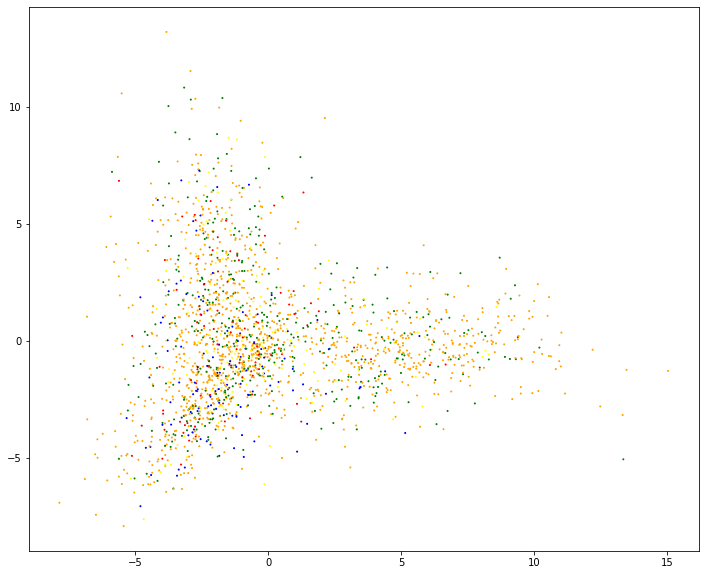

In [103]:
# pca 
#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::50]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["label"].map({1:"blue", \
                                 2:"red", \
                                 3:"yellow", \
                                 4:"green", \
                                 5:"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(12,10))
plt.scatter(x_axis, y_axis, color=color_map, s=1)
plt.show()

In [104]:
X_centered = model_df - model_df.mean()
y = model_df['label']

X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.5,random_state=42)

print(X_train.shape)

(50000, 101)


In [105]:
model_df.mean()

0        0.066135
1       -0.471659
2        0.451980
3       -0.402534
4       -0.022317
           ...   
96      -0.068973
97       0.187864
98      -0.290508
99      -0.402832
label    4.231190
Length: 101, dtype: float64

In [106]:
pca = PCA(n_components=2)
pca.fit(X_train)
pcafeatures_train = pca.transform(X_train)

In [107]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()

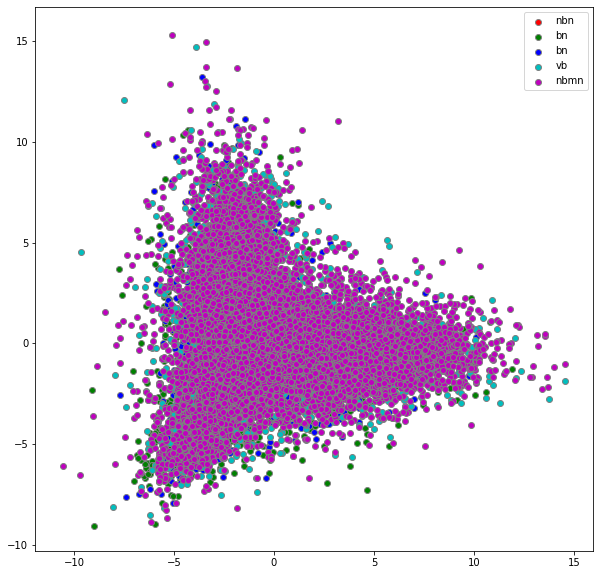

In [108]:
plot_PCA_2D(pcafeatures_train, target=y_train, target_names=['nbn','bn','bn','vb','nbmn'])

In [144]:
# tsne 
word_bank = ["ebay", "samsung", "microsoft", "good", "bose","apple"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

ebay: ['sell' 'byw' 'sale' 'refurbish' 'refurbished']
samsung: ['plasma' 'dlp' 'lg' 'olevia' 'touchsmart']
microsoft: ['ms' 'logitech' 'mouse' 'intellimouse' 'explorer']
good: ['decent' 'great' 'excellent' 'well' 'best']
bose: ['quietcomfort' 'triport' 'triports' 'klipsch' '301']
apple: ['macintosh' 'powerbook' 'imac' 'ibook' 'g4']


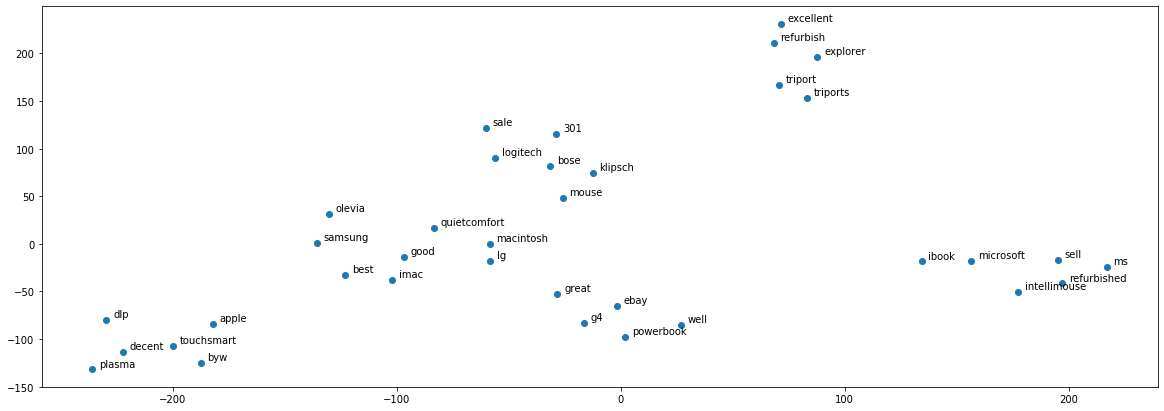

In [145]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()


In [111]:
word_vec.wv.most_similar(positive=["cheap"], \
                      negative=["quality"], topn=1)

[('overpriced', 0.44785282015800476)]

In [112]:
%%time
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

sound 0.014969826
good 0.014263166
buy 0.0126945255
use 0.010491477
one 0.00945384
CPU times: user 52 s, sys: 5.62 s, total: 57.6 s
Wall time: 51.6 s


In [113]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 sound, 0.014969825744628906
 good, 0.01426316611468792
 buy, 0.01269452553242445
 use, 0.010491477325558662
 one, 0.009453839622437954

Topic 2:
 work, 0.020482361316680908
 cable, 0.015227256342768669
 use, 0.01500928495079279
 one, 0.009730461053550243
 great, 0.008533207699656487

Topic 3:
 lens, 0.040667176246643066
 use, 0.014075640588998795
 get, 0.010677799582481384
 filter, 0.009196081198751926
 good, 0.007975459098815918

Topic 4:
 player, 0.01949886791408062
 play, 0.007743563037365675
 cd, 0.007736413273960352
 remote, 0.007408318109810352
 mp3, 0.007182405795902014

Topic 5:
 radio, 0.011198397725820541
 good, 0.009680423885583878
 quality, 0.009051232598721981
 one, 0.00880399253219366
 use, 0.008258030749857426

Topic 6:
 use, 0.01413143053650856
 get, 0.011402045376598835
 dvd, 0.011316481046378613
 tv, 0.01015239767730236
 work, 0.00952568557113409

Topic 7:
 card, 0.016436610370874405
 get, 0.010324990376830101
 use, 0.009750684723258018
 camera, 0.009339024

In [114]:
import pyLDAvis.gensim

lda_idm = pyLDAvis.gensim.prepare(bow_lda, bow, vocabulary)

pyLDAvis.display(lda_idm)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [115]:
## modeling 
model_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-1.045874,-1.505056,0.400089,-1.163624,0.005900,0.734507,-0.594378,0.544936,-0.451328,-0.133559,...,-0.744814,0.208564,-0.267359,-0.713452,-0.485555,-0.662419,-0.389493,-0.607298,-0.020522,5
1,-0.500002,-1.146990,0.642990,0.115208,-0.045583,0.745332,-0.871370,-0.174490,-0.130963,0.171207,...,-1.135397,0.549728,-1.081566,-0.341251,-0.002464,0.079581,0.037554,-0.835034,0.672192,1
2,0.322246,-1.863205,0.589784,-0.154426,-0.666302,0.702713,-0.316577,-0.521499,-0.181140,0.056830,...,-1.067431,0.409340,-0.419347,-0.193481,0.266484,-0.292767,1.269651,-0.517289,0.353402,3
3,-0.437533,-1.202451,0.649144,-0.450811,0.218815,0.583947,-0.619688,-0.200287,-0.592843,-0.347117,...,-0.996977,0.189135,-0.599003,-0.175100,-0.488239,0.017967,0.413516,-0.344369,0.165894,2
4,-0.458159,-1.757634,0.939242,-0.280623,-0.578751,0.373338,0.103553,-0.809795,-0.448702,-0.719845,...,-1.818599,0.574199,-0.368552,-0.765138,-0.032745,-0.845454,0.892331,-0.503336,0.277776,1


In [116]:
nans = model_df[model_df[0].isna()].index

In [117]:
print(nans[0:50])
 

Int64Index([], dtype='int64')


In [118]:
model_df[2].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: 2, Length: 100000, dtype: bool

In [119]:
model_df = model_df.dropna(axis=0)
display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-1.045874,-1.505056,0.400089,-1.163624,0.005900,0.734507,-0.594378,0.544936,-0.451328,-0.133559,...,-0.744814,0.208564,-0.267359,-0.713452,-0.485555,-0.662419,-0.389493,-0.607298,-0.020522,5
1,-0.500002,-1.146990,0.642990,0.115208,-0.045583,0.745332,-0.871370,-0.174490,-0.130963,0.171207,...,-1.135397,0.549728,-1.081566,-0.341251,-0.002464,0.079581,0.037554,-0.835034,0.672192,1
2,0.322246,-1.863205,0.589784,-0.154426,-0.666302,0.702713,-0.316577,-0.521499,-0.181140,0.056830,...,-1.067431,0.409340,-0.419347,-0.193481,0.266484,-0.292767,1.269651,-0.517289,0.353402,3
3,-0.437533,-1.202451,0.649144,-0.450811,0.218815,0.583947,-0.619688,-0.200287,-0.592843,-0.347117,...,-0.996977,0.189135,-0.599003,-0.175100,-0.488239,0.017967,0.413516,-0.344369,0.165894,2
4,-0.458159,-1.757634,0.939242,-0.280623,-0.578751,0.373338,0.103553,-0.809795,-0.448702,-0.719845,...,-1.818599,0.574199,-0.368552,-0.765138,-0.032745,-0.845454,0.892331,-0.503336,0.277776,1


In [120]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 101 entries, 0 to label
dtypes: float32(100), int64(1)
memory usage: 39.7 MB


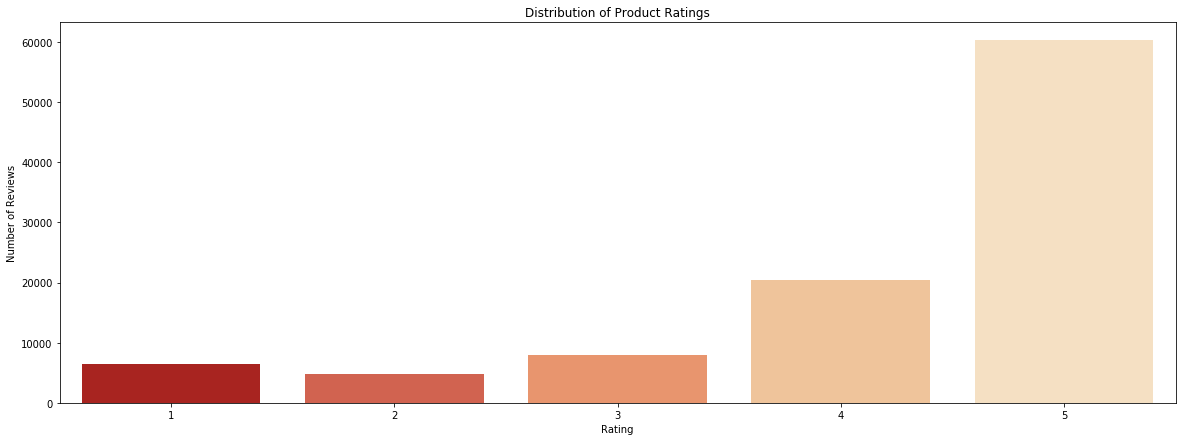

In [121]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["overall"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [122]:
## definately unbalanced 
X = model_df.drop(['label'],axis=1)
y = model_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_smoted, y_smoted = sm.fit_sample(X_train, y_train.ravel())

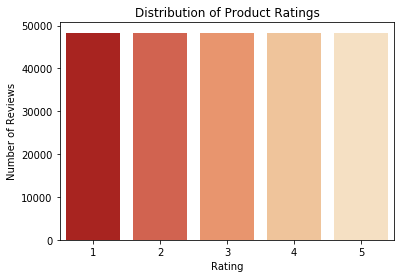

In [123]:
ax = sns.countplot(x=y_smoted, palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [124]:
# scoring and baseline models 
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 5)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")

Baseline Accuracy: 59.810%
Baseline F1 Score: 0.598


In [125]:
# test 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Set Accuracy: 64.312%
Training Set F1 Score: 0.643


In [126]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_train)
accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Set Accuracy: 64.312%
Training Set F1 Score: 0.643
Training Set Accuracy: 99.970%
Training Set F1 Score: 1.000


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Set Accuracy: 98.961%
Training Set F1 Score: 0.990
Training Set Accuracy: 64.651%
Training Set F1 Score: 0.647


In [127]:
# selecting random forest not only beacuse of accuracy score but also on the 
# checking cross validation for random to check for consistency 
cross_val_accuracy = cross_val_score(rf, X_train, y_train, \
                               cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(rf, X_train, y_train, \
                               cv=3, scoring="f1_micro")

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")

Training Set Accuracy: 58.623%
Training Set F1 Score: 0.589


In [128]:
# trying xgboost 
import xgboost as xgb

y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

parameters = {"max_depth": 10, "eta": 0.2, "silent": 1, \
              "objective": "multi:softprob", "num_class": 5}

boost = xgb.train(parameters, train_set, 100)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [129]:
y_pred = boost.predict(train_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 99.865%
Training Set F1 Score: 0.999


In [130]:
boost_cv = xgb.cv(dtrain=train_set, params=parameters, nfold=3, \
                  num_boost_round=50, early_stopping_rounds=10, \
                  metrics="merror", as_pandas=True, seed=42)

display(boost_cv.head())

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.293950,0.002100,0.408587,0.004375
1,0.273537,0.002654,0.390712,0.003329
2,0.261244,0.001982,0.384400,0.003001
3,0.252644,0.002649,0.379525,0.003777
4,0.243787,0.003288,0.376963,0.003305


In [131]:
# we select xgboost now lets test this model on the testing set and on the balanced set that we initially created 
y_train_shifted = y_smoted-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_smoted, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")
# final socre on the balanced dataset 

Balanced Test Set Accuracy: 64.095%
Balanced Test Set F1 Score: 0.641


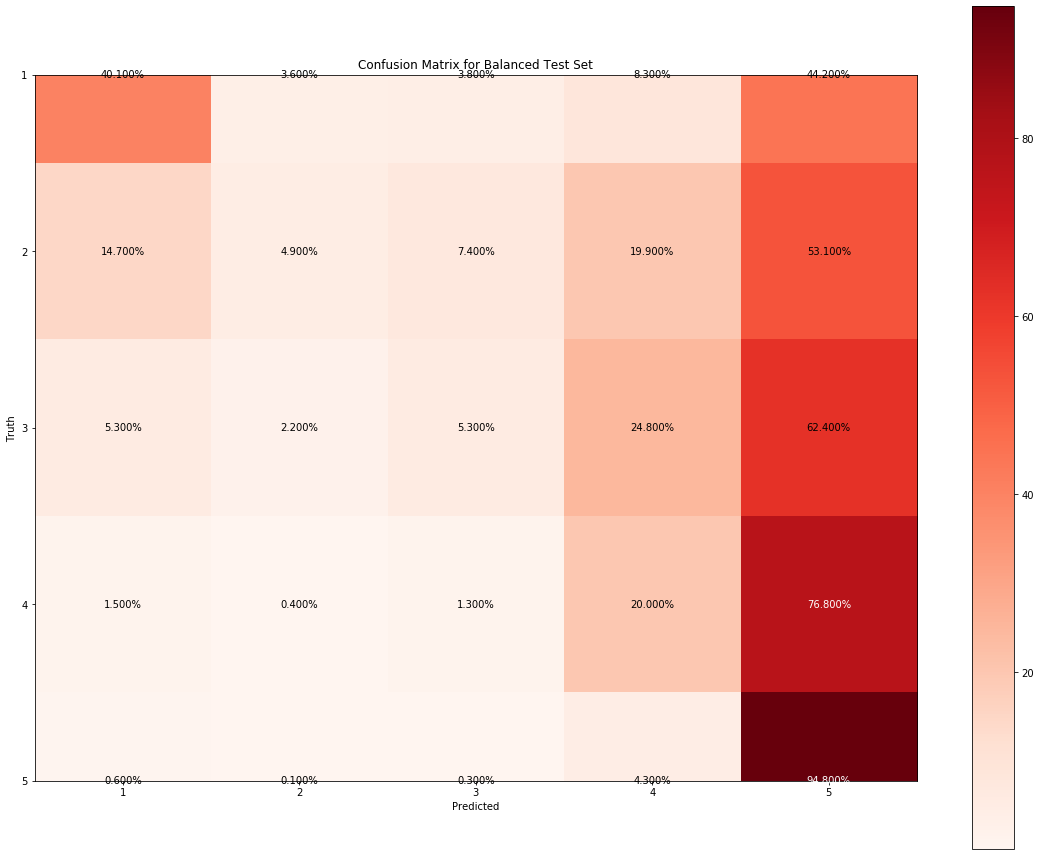

In [132]:
# 
#create the confusion matrix of the balanced test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(16,12))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Balanced Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()


In [133]:
print('hi')

hi


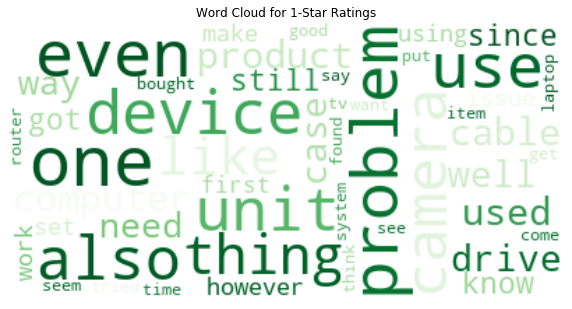

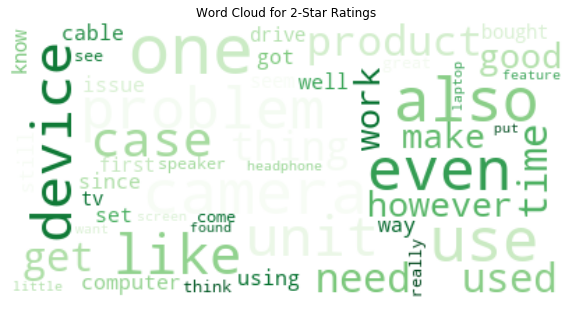

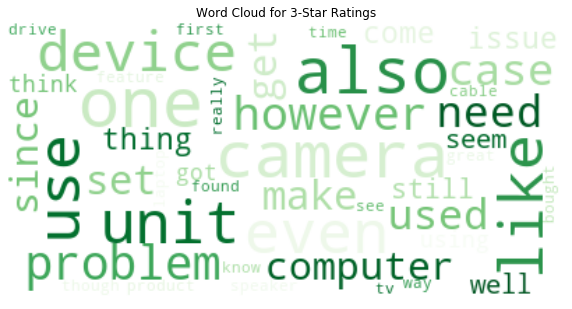

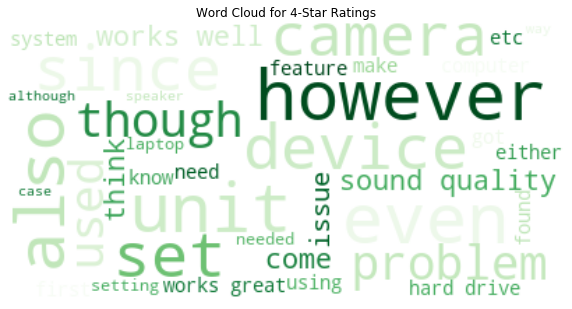

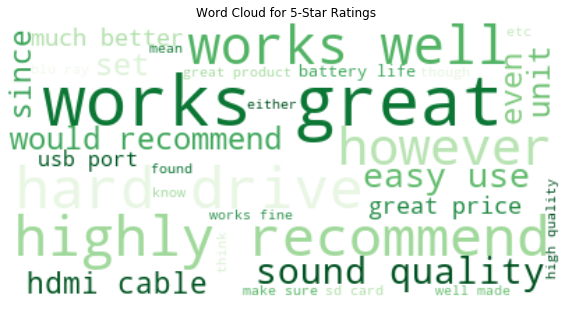

In [148]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Greens")

one_star_text = " ".join(df1[df1["overall"]==1]["reviewText"].values).lower()
two_star_text = " ".join(df1[df1["overall"]==2]["reviewText"].values).lower()
three_star_text = " ".join(df1[df1["overall"]==3]["reviewText"].values).lower()
four_star_text = " ".join(df1[df1["overall"]==4]["reviewText"].values).lower()
five_star_text = " ".join(df1[df1["overall"]==5]["reviewText"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()